In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load in the stock-data from Google Finance from .csv file**

In [3]:
df = pd.read_csv('StockPrices.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [4]:
# Compute simple returns from stock prices
df_rets = df.pct_change()

**1. Produce a scatterplot of each time return time series (compute the returns using open prices). What do you observe? Comment on where they are centered, and how spread out the graphs
are.**

We note that both returns are centered around zero, though BBVA exhibits a larger *spread* or wider dispersion for daily returns relative to MSFT

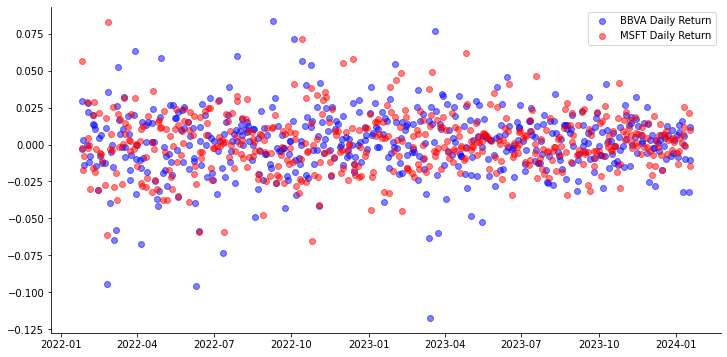

In [10]:
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(12)

ax.spines[['right', 'top']].set_visible(False)
ax.scatter(df_rets.index, df_rets['BBVA'], label='BBVA Daily Return', color='b', alpha=0.5)
ax.scatter(df_rets.index, df_rets['MSFT'], label='MSFT Daily Return', color='r', alpha=0.5)
ax.legend()

plt.show()

**2. Produce a histogram of each time return time series. Does the histogram confirm your findings from the scatterplot?**

The histogram confirms the earlier observation, that being BBVA appears to exhibit a larger variance with greater downside potential as evidenced with negative returns less than -10%

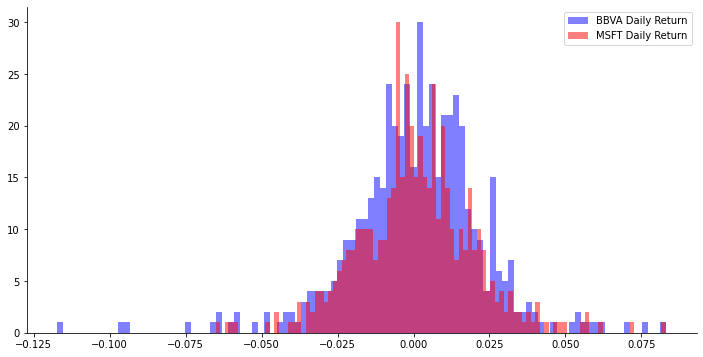

In [12]:
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(12)

ax.spines[['right', 'top']].set_visible(False)
ax.hist(x=df_rets['BBVA'], bins=100, label='BBVA Daily Return', alpha=0.5, color='b')
ax.hist(x=df_rets['MSFT'], bins=100, label='MSFT Daily Return', alpha=0.5, color='r')
ax.legend()

plt.show()

**3. Compute the mean and variance of each return time series. Do these statistics reflect your perception from the graphs?**

Computing the mean and variance comports with the earlier expectations noted from observing the graphs, as the variance for BBVA is greater than MSFT

In [13]:
print(f'BBVA Stock\n\tMean:{df_rets.BBVA.mean()}\n\tVariance:{df_rets.BBVA.var()}')
print(f'MSFT Stock\n\tMean:{df_rets.MSFT.mean()}\n\tVariance:{df_rets.MSFT.var()}')

BBVA Stock
	Mean:0.0009485427516400388
	Variance:0.0004865802327538936
MSFT Stock
	Mean:0.0007677783416585425
	Variance:0.0003596320943499966


**4. Compute the covariance of the two return time series. What do you observe? Can you explain your findings using common arguments? (for instance the fact that they belong to difference sectors, the fact that the two companies are located in different countries, etc...)**

Observing the covariance of the two-return series we note that the directionality of either stock (i.e. BBVA and MSFT) is positive, though not strongly correlated. As such, while these stocks may trend together due to relative size and stability (i.e., blue-chip status), due to the firms operating under separate sectors in different geographic regions, they are exposed to alternative idiosyncratic catalysts such as domestic growth/inflation.

In [14]:
df_rets.cov() # Covariance

,BBVA,MSFT
BBVA,0.000487,0.000157
MSFT,0.000157,0.000360


In [15]:
df_rets.corr() # Correlation

,BBVA,MSFT
BBVA,1.00000,0.37644
MSFT,0.37644,1.00000
